## Librerías

In [8]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Datos 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score

## Data

In [2]:
url = 'https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
data = pd.read_csv(url)

In [3]:
df = data.copy()

## Primera Exploración

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


##### Traducciones variables

- bill_length_mm = longitud del pico 
- bill_depth_mm = profundidad del pico
- flipper_length_mm = longitud de la aleta
- body_mass = masa corporal

In [6]:
df.describe(include='all')

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,344.000000,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,NaN,3,3,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,NaN,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,172.500000,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,99.448479,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,1.000000,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,86.750000,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,172.500000,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,258.250000,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [7]:
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [9]:
df.isnull().sum()

rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [11]:
df.duplicated().sum()

0

### Histograma para ver Distribución de variables numéricas

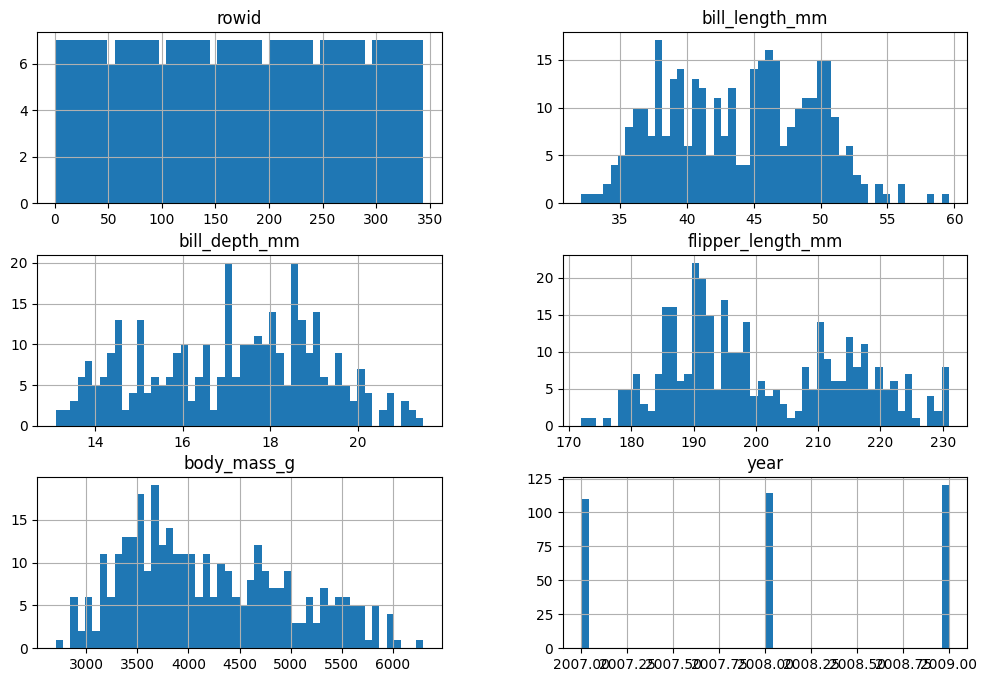

In [12]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

### Gráfico de Barras para variables categóricas

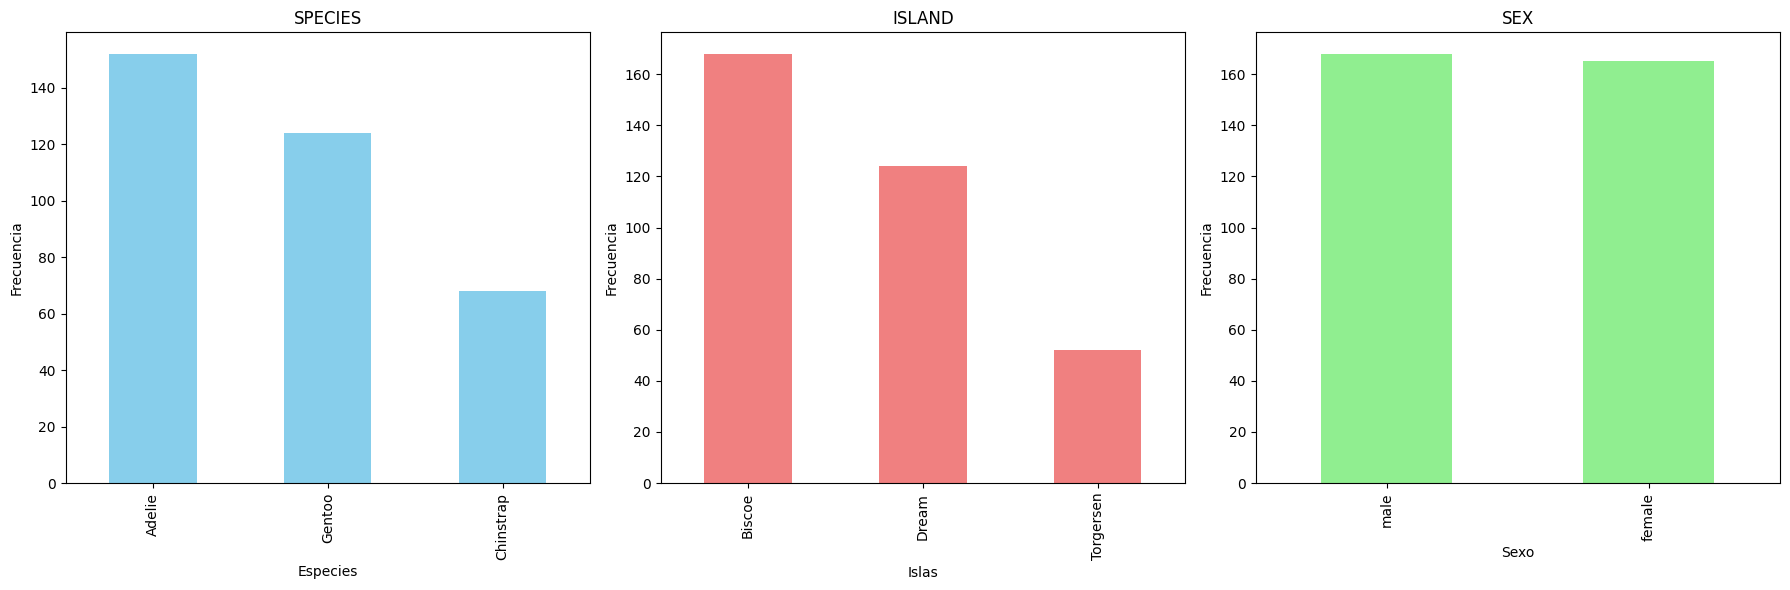

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tu DataFrame se llama df y contiene columnas categóricas llamadas 'categoria1', 'categoria2' y 'categoria3'.
# Reemplaza estos nombres de columna según tus datos.

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Grafico de barras para la primera variable categórica
df['species'].value_counts().plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('SPECIES')
axes[0].set_xlabel('Especies')
axes[0].set_ylabel('Frecuencia')

# Grafico de barras para la segunda variable categórica
df['island'].value_counts().plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('ISLAND')
axes[1].set_xlabel('Islas')
axes[1].set_ylabel('Frecuencia')

# Grafico de barras para la tercera variable categórica
df['sex'].value_counts().plot(kind='bar', color='lightgreen', ax=axes[2])
axes[2].set_title('SEX')
axes[2].set_xlabel('Sexo')
axes[2].set_ylabel('Frecuencia')

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()
